# Linear Regression and The Foundation Of Deep Learning

## What is Linear Regression?

Linear regression is a statistical method used to model and analyze the relationships between a dependent (target) variable and one or more independent (predictor) variables. The primary goal is to establish a linear equation that can predict the value of the dependent variable based on the values of the independent variables. The simplest form is simple linear regression, which involves one independent variable, while multiple linear regression involves two or more independent variables.

In machine learning, linear regression is a fundamental supervised learning algorithm used for regression tasks, where the output is a continuous value. It assumes a linear relationship between the input features and the target variable. The model learns this relationship by fitting a line (or hyperplane in higher dimensions) that minimizes the difference between the actual and predicted values.

![](https://miro.medium.com/v2/resize:fit:1400/0*0plB5_YzkViGnD3j.gif)

## Very Simple Linear Regression Example

In [39]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [40]:
# Step 1: Generate a simple dataset
# X represents the feature (e.g., area in square feet), y represents the target (e.g., price in $1000s)
X = np.array([500, 600, 700, 800, 900, 1000, 1100, 1200]).reshape(-1, 1)  # Feature: house area
y = np.array([50, 60, 65, 70, 75, 85, 95, 100])  # Target: house price in $1000s

In [41]:
# Step 2: Fit a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions for the same data
y_pred = model.predict(X)

Intercept: 15.297619047619058
Coefficient (slope): 0.07023809523809522


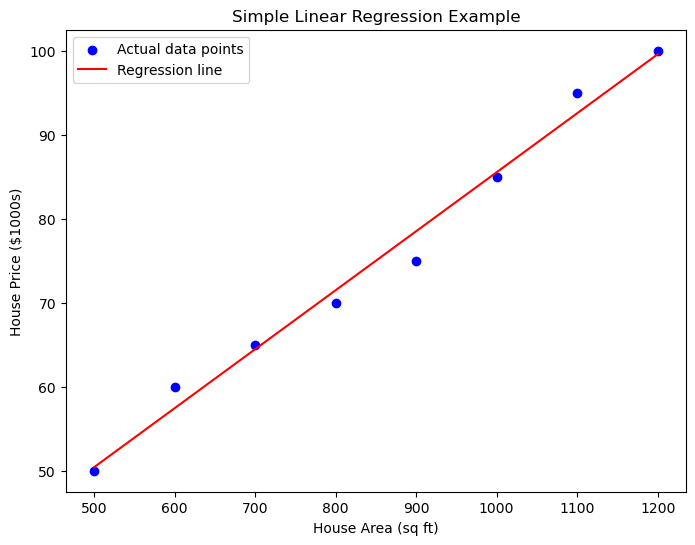

In [42]:
# Step 4: Display coefficients and visualize the data and the regression line
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (slope): {model.coef_[0]}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data points')  # Plot actual data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Plot regression line
plt.title('Simple Linear Regression Example')
plt.xlabel('House Area (sq ft)')
plt.ylabel('House Price ($1000s)')
plt.legend()
plt.show()

## Modern Approach vs. By Hand

### Generating Data For The Examples

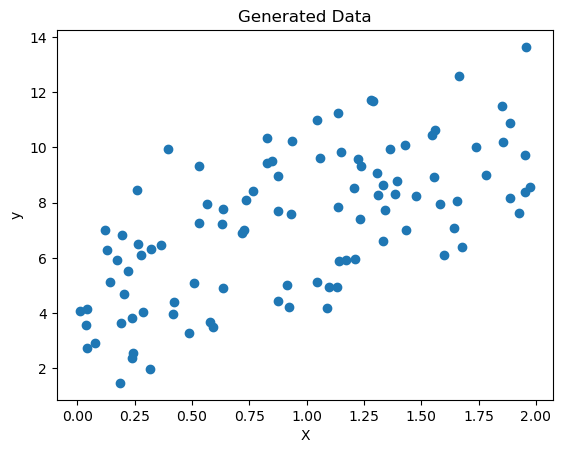

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of data points
num_points = 100

# Generate some data
np.random.seed(0)
X = 2 * np.random.rand(num_points, 1)
y = 4 + 3 * X + 2 * np.random.randn(num_points, 1)

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

### Modern Approach To Linear Regression Using Sci-Kit Learn

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Get model parameters
theta_0 = model.intercept_[0]  # Intercept
theta_1 = model.coef_[0][0]   # Slope

print(f"Intercept (theta_0): {theta_0}")
print(f"Slope (theta_1): {theta_1}")

Intercept (theta_0): 4.444302154894459
Slope (theta_1): 2.9369350214020384


In [46]:
# Make predictions
y_pred = model.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.9697545948985917


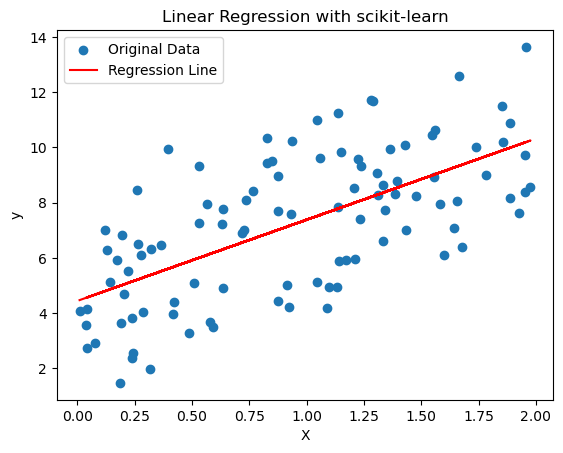

In [47]:
# Plot the results
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with scikit-learn')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, mean_squared_log_error,
    r2_score, explained_variance_score, max_error, median_absolute_error
)

# Compute metrics
metrics = {
    "Mean Absolute Error (MAE)": mean_absolute_error(y, y_pred),
    "Mean Squared Error (MSE)": mean_squared_error(y, y_pred),
    "Root Mean Squared Error (RMSE)": mean_squared_error(y, y_pred, squared=False),
    "Mean Squared Logarithmic Error (MSLE)": mean_squared_log_error(y, np.clip(y_pred, 1e-10, None)),  # Clip to avoid log(0)
    "R² Score": r2_score(y, y_pred),
    "Explained Variance Score": explained_variance_score(y, y_pred),
    "Max Error": max_error(y, y_pred),
    "Median Absolute Error": median_absolute_error(y, y_pred),
}

# Print metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Mean Absolute Error (MAE): 1.6985
Mean Squared Error (MSE): 3.9698
Root Mean Squared Error (RMSE): 1.9924
Mean Squared Logarithmic Error (MSLE): 0.0765
R² Score: 0.4194
Explained Variance Score: 0.4194
Max Error: 4.3468
Median Absolute Error: 1.6093


### Linear Regression From Scratch

Linear regression models the relationship between an independent variable $ X $ and a dependent variable $ y $. 

The equation for the regression line is:

$$
\hat{y} = \theta_0 + \theta_1 X
$$

Where:

- $ \hat{y} $ is the predicted value.
- $ \theta_0 $ (intercept) and $ \theta_1 $ (slope) are the parameters to learn.

The goal is to minimize the **cost function**, the Mean Squared Error (MSE):

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$

Here:
- $ m $ is the number of training examples.
- $ \hat{y}_i $ is the predicted value for the $ i^{th} $ example.
- $ y_i $ is the actual value for the $ i^{th} $ example.

**Gradient descent** is used to minimize this cost function by iteratively updating the parameters $ \theta $. The update rule for parameter $ \theta_j $ is:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Where:
- $ \alpha $ is the learning rate (controls the step size for updates).
- $ \frac{\partial J(\theta)}{\partial \theta_j} $ is the partial derivative of the cost function with respect to $ \theta_j $.

**This iterative process adjusts $ \theta $ to find the values that minimize the cost function, resulting in the best-fit line for the data.**


#### Initialize Parameters

In [10]:
theta = np.random.randn(2, 1)  # Random initial weights (theta)
learning_rate = 0.1

#### Compute The Prediction And Loss

In [11]:
# Add x0 = 1 to each instance for the intercept term
X_b = np.c_[np.ones((num_points, 1)), X]

In [12]:
def predict(X, theta):
    """
    Predicts y values based on current theta values.
    """
    return X.dot(theta)

def compute_loss(y, y_pred):
    """
    Computes Mean Squared Error (MSE) Loss.
    """
    m = len(y)
    return np.sum((y - y_pred) ** 2) / (2 * m)

**Predictions**: 

 $
 \hat{y} = X \cdot \theta
 $
 
 Here, $ X $ includes a column of ones for the intercept ($ \theta_0 $).

**Loss**: 

 $
 J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
 $

Where:
 - $ m $ is the number of training examples.
 - $ \hat{y}_i $ is the predicted value for the $ i^{th} $ example.
 - $ y_i $ is the actual value for the $ i^{th} $ example.

#### Computing The Gradient

In [13]:
def compute_gradient(X, y, y_pred):
    """
    Computes the gradient of the loss function.
    """
    m = len(y)
    return -(1 / m) * X.T.dot(y - y_pred)

**Gradient for $ \theta_j $**:

$
\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i) x_{ij}
$

Where:
- $ J(\theta) $ is the cost function.
- $ m $ is the number of training examples.
- $ y_i $ is the actual value for the $ i^{th} $ example.
- $ \hat{y}_i $ is the predicted value for the $ i^{th} $ example.
- $ x_{ij} $ is the value of the $ j^{th} $ feature for the $ i^{th} $ training example.

The gradient measures how much $ J(\theta) $ changes with respect to $ \theta_j $. It is used to adjust $ \theta_j $ during gradient descent to minimize the cost function.


#### Training The Model Using Gradient Descent

In [14]:
def gradient_descent(X, y, theta, learning_rate, num_iterations, tol=1e-6):
    """
    Performs gradient descent to minimize the loss function.
    """
    loss_history = []

    for i in range(num_iterations):
        # Compute predictions
        y_pred = predict(X, theta)

        # Compute the loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

        # Compute the gradient
        gradients = compute_gradient(X, y, y_pred)

        # Update theta
        theta = theta - learning_rate * gradients

        # Check for convergence
        if i > 0 and abs(loss_history[-2] - loss_history[-1]) < tol:
            break

    return theta, loss_history

# Train the model
num_iterations = 1000
theta, loss_history = gradient_descent(X_b, y, theta, learning_rate, num_iterations)



**Parameter update rule**:

$
\theta := \theta - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta}
$

Where:
- $ \alpha $ is the learning rate.
- $ \frac{\partial J(\theta)}{\partial \theta} $ is the gradient of the cost function with respect to $ \theta $.

Stop when the change in loss is below a tolerance ($ \text{tol} $) or after a fixed number of iterations.


#### Plotting The Loss

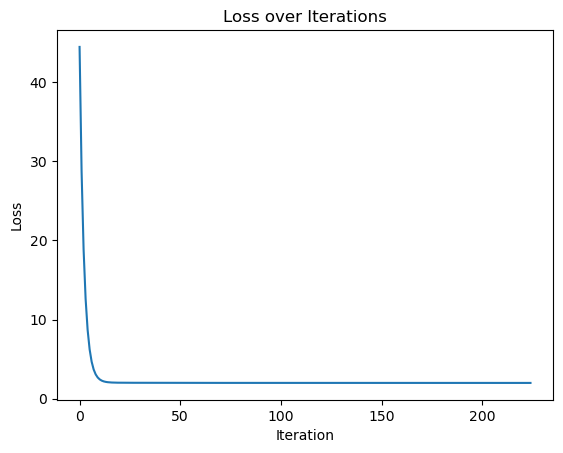

In [15]:
# Plot the loss over iterations
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

#### Plotting The Regression Line

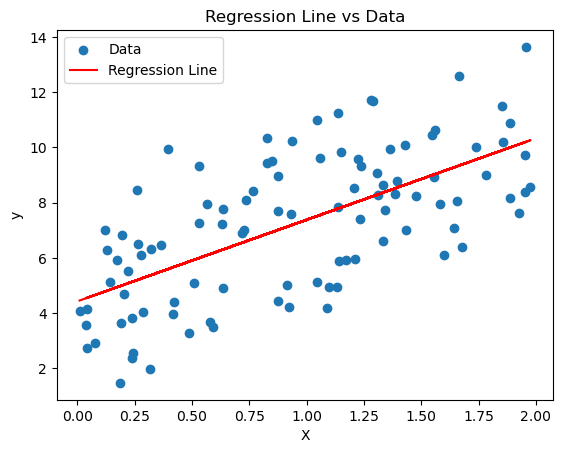

In [16]:
# Plot the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, predict(X_b, theta), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line vs Data')
plt.legend()
plt.show()

## Linear Regression Assumptions

1. **Linear Relationship:** The core premise of multiple linear regression is the existence of a linear relationship between the dependent (outcome) variable and the independent variables. This linearity can be visually inspected using scatterplots, which should reveal a straight-line relationship rather than a curvilinear one.

2. **Multivariate Normality:** The analysis assumes that the residuals (the differences between observed and predicted values) are normally distributed. This assumption can be assessed by examining histograms or Q-Q plots of the residuals, or through statistical tests such as the Kolmogorov-Smirnov test.

3. **No Multicollinearity:** It is essential that the independent variables are not too highly correlated with each other, a condition known as multicollinearity. This can be checked using:
    - Correlation matrices, where correlation coefficients should ideally be below 0.80.
    - Variance Inflation Factor (VIF), with VIF values above 10 indicating problematic multicollinearity. 

4. **Homoscedasticity:** The variance of error terms (residuals) should be consistent across all levels of the independent variables. A scatterplot of residuals versus predicted values should not display any discernible pattern, such as a cone-shaped distribution, which would indicate heteroscedasticity. 

## Minimizing the Sum of Squared Errors (SSE)

#### What are Squared Errors?

In machine learning and statistics, **errors** (or residuals) refer to the difference between the **actual values** of the target variable and the **predicted values** produced by a model. When we perform regression tasks, the error for each data point is given by:

$$
\text{Error}_i = y_i - \hat{y}_i
$$

Where:
- $ y_i $ is the actual value (observed data),
- $ \hat{y}_i $ is the predicted value (from the model).

#### Squared Errors

**Squared error** is simply the square of this error:

$$
\text{Squared Error}_i = (y_i - \hat{y}_i)^2
$$

Squaring the error has two main effects:

1. **Emphasizing Larger Errors:** Squaring makes larger errors more significant because larger deviations from the actual values are penalized more heavily.

2. **Positive Values:** Squaring ensures that all errors are positive, avoiding issues of negative errors canceling out positive ones when summing across multiple data points.

For a dataset with multiple data points, the **sum of squared errors (SSE)** is calculated as:

$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where $ n $ is the number of data points.

#### Minimizing the Sum of Squared Errors (SSE)

The goal in **linear regression** is to find the model parameters (slope and intercept) that minimize the sum of squared errors. By minimizing SSE, we ensure that the predicted values are as close as possible to the actual values, on average.

Mathematically, in the context of simple linear regression, the prediction $ \hat{y}_i $ is modeled as:

$$
\hat{y}_i = \beta_0 + \beta_1 x_i
$$

Where:
- $ \beta_0 $ is the intercept,
- $ \beta_1 $ is the slope,
- $ x_i $ is the input (independent variable).

We want to find the values of $ \beta_0 $ and $ \beta_1 $ that minimize the sum of squared errors:

$$
\min_{\beta_0, \beta_1} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2
$$

This minimization problem is typically solved using calculus or numerical optimization methods (like **gradient descent**), leading to the least squares solution.

![](hk00xm44y2o91.gif)

## Stochastic Gradient Descent

In the context of **linear regression**, we want to find the best-fitting line for a dataset by minimizing the **cost function** (typically the **sum of squared errors (SSE)**). Gradient Descent (GD) and Stochastic Gradient Descent (SGD) are optimization techniques used to minimize the cost function and find the optimal parameters ($\beta_0$ and $\beta_1$).

- **Gradient Descent (GD):** 
  - It is an iterative optimization algorithm used to minimize a cost function by adjusting the model's parameters (slope and intercept in linear regression). 
  - In each iteration, it updates the parameters in the direction of the **negative gradient** of the cost function, which points toward the minimum of the function.

- **Stochastic Gradient Descent (SGD):** 
  - A variant of Gradient Descent where instead of computing the gradient using the entire dataset (like in GD), we compute the gradient for each data point or a small batch (aka mini-batches).
  - This introduces some noise in the updates, but makes the method faster and allows it to scale better to large datasets.

#### Cost Function for Linear Regression

For linear regression, the cost function (also called the **Mean Squared Error (MSE)**) is given by:

$$
J(\beta_0, \beta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$

Where:
- $ m $ is the number of data points,
- $ \hat{y}_i $ is the predicted value for the \( i \)-th data point (\( \hat{y}_i = \beta_0 + \beta_1 x_i \)),
- $ y_i $ is the actual value for the \( i \)-th data point.

We minimize this cost function by iteratively adjusting $\beta_0$ and $\beta_1$ using **gradient descent**.

#### Gradient Descent Formula

The parameters $\beta_0$ and $\beta_1$ are updated as follows:

$$
\beta_0 = \beta_0 - \alpha \frac{\partial J}{\partial \beta_0}
$$
$$
\beta_1 = \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}
$$

Where:
- $\alpha$ is the learning rate (a hyperparameter that controls the size of the steps),
- $\frac{\partial J}{\partial \beta_0}$ and $\frac{\partial J}{\partial \beta_1}$ are the partial derivatives of the cost function with respect to $\beta_0$ and $\beta_1$.

The gradients (partial derivatives) for the parameters are:

$$
\frac{\partial J}{\partial \beta_0} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)
$$
$$
\frac{\partial J}{\partial \beta_1} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i
$$

#### Stochastic Gradient Descent (SGD)

In **stochastic gradient descent**, we update the parameters for each training example, rather than for the entire dataset at once. This makes the updates faster, especially for large datasets, but introduces some noise in the convergence.

SGD updates the parameters as:

$$
\beta_0 = \beta_0 - \alpha (\hat{y}_i - y_i)
$$
$$
\beta_1 = \beta_1 - \alpha (\hat{y}_i - y_i) x_i
$$

Here, the update is performed using only a single data point at each step (or a small batch of data).


## Stochastic Gradient Descent Example

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points for X
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

In [18]:
# Function to compute the cost (Mean Squared Error)
def compute_cost(X, y, beta_0, beta_1):
    m = len(y)
    predictions = beta_0 + beta_1 * X
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [19]:
# Stochastic Gradient Descent Algorithm
def stochastic_gradient_descent(X, y, beta_0, beta_1, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        #print('-----------')
        for i in range(m):
            rand_index = np.random.randint(0, m)
            X_i = X[rand_index, :].reshape(1, X.shape[1])
            y_i = y[rand_index].reshape(1, 1)
            predictions = beta_0 + beta_1 * X_i
            beta_0 -= learning_rate * (predictions - y_i)
            beta_1 -= learning_rate * (predictions - y_i) * X_i
            #print(beta_0, beta_1)
        cost_history[it] = compute_cost(X, y, beta_0, beta_1)
    
    return beta_0, beta_1, cost_history

In [20]:
# Initial parameters for SGD
beta_0 = 0  # Intercept
beta_1 = 0  # Slope
learning_rate = 0.01
iterations = 1000

# Perform stochastic gradient descent
beta_0, beta_1, cost_history_sgd = stochastic_gradient_descent(X, y, beta_0, beta_1, learning_rate, iterations)

# Print the results
print(f"Final intercept (beta_0) using SGD: {beta_0}")
print(f"Final slope (beta_1) using SGD: {beta_1}")

Final intercept (beta_0) using SGD: [[4.11019589]]
Final slope (beta_1) using SGD: [[2.7926811]]


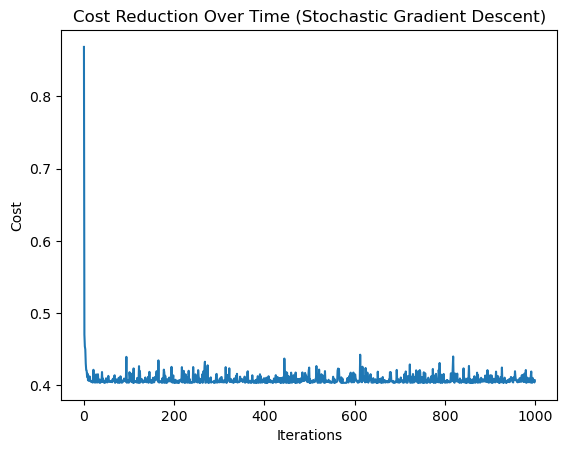

In [21]:
# Plot the cost history (cost decreases over time)
plt.plot(range(iterations), cost_history_sgd)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time (Stochastic Gradient Descent)")
plt.show()


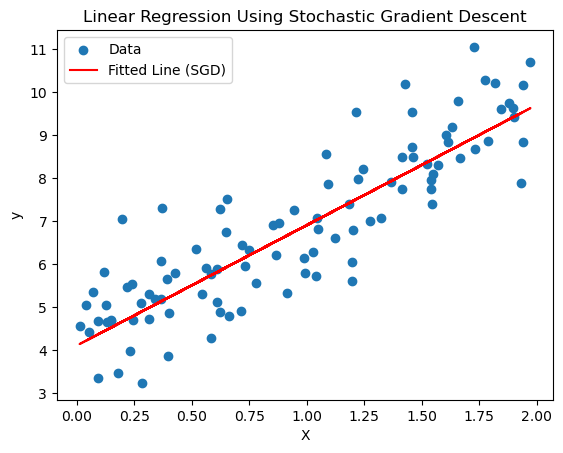

In [22]:
# Plot the fitted line using SGD
plt.scatter(X, y, label='Data')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='Fitted Line (SGD)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Using Stochastic Gradient Descent')
plt.legend()
plt.show()

### Why Linear Regression is Fundamental to Deep Learning

#### Core Mathematical Concepts
- Linear regression introduces critical concepts like weights ($ \theta $), biases ($ b $), and loss functions, which are central to deep learning.
- The optimization of the cost function in linear regression using gradient descent mirrors the same principle used in training neural networks.

#### Connection to Neural Networks
- A single-layer neural network without any activation function is mathematically equivalent to linear regression:
  $$
  \hat{y} = X \cdot W + b
  $$
  Here:
  - $ W $ corresponds to the weights ($ \theta $).
  - $ b $ corresponds to the intercept.
- This makes linear regression a simplified example of how data flows through a model to produce predictions.

#### Baseline Model for Comparison
- Linear regression is often used as a baseline to evaluate the performance of more complex deep learning models. 
- If a neural network doesn't outperform linear regression on a task, it suggests that the added complexity may not be justified.

#### Feature Scaling and Input Representation
- Linear regression highlights the importance of preprocessing techniques like feature scaling, which are essential for training deep learning models efficiently.

#### Gradient Descent
- Training deep learning models relies heavily on gradient descent, an optimization technique first encountered in linear regression.
- Understanding how gradients are calculated and used to update parameters in linear regression helps in grasping backpropagation in neural networks.

## Real World Example

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Load the dataset from a CSV file (replace the path with your dataset location)
path = 'Kaggle_Housing_Data.csv'
df = pd.read_csv(path)

In [25]:
# Display the first few rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
# Calculate the correlation between Variable1 and Variable2
correlation = df['area'].corr(df['stories'])

# Display the correlation
print(f"Correlation between Variable1 and Variable2: {correlation:.4f}")

Correlation between Variable1 and Variable2: 0.0840


/var/folders/fm/zbjt5b095lx6_6skdjzm23xr0000gn/T/ipykernel_64629/559908563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


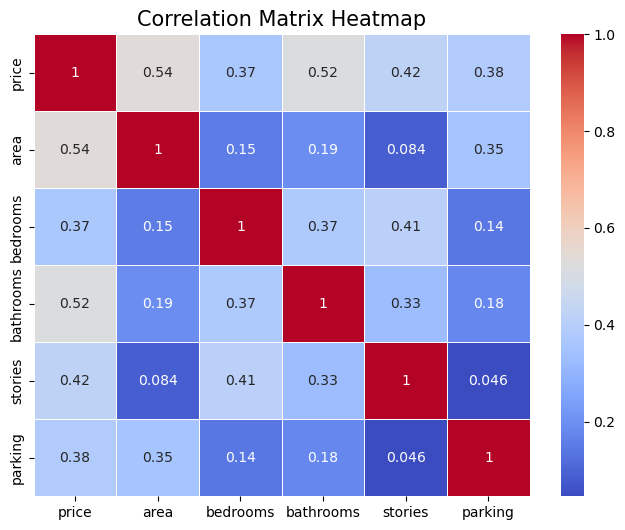

In [27]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title to the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=15)

# Show the plot
plt.show()


In [28]:
# Check the columns in the dataset
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [29]:
# Convert categorical columns to numerical values (if needed)
# For example: 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', and 'furnishingstatus'
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [30]:
# Features (X) and Target (y)
X = df[['area', 'bedrooms', 'bathrooms','stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 
        'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]

y = df['price']

In [31]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -127711.1673924448
Coefficients: [2.35848772e+02 7.85744924e+04 1.09711727e+06 4.06223164e+05
 3.66824192e+05 2.33146766e+05 3.93159779e+05 6.87881311e+05
 7.85550579e+05 2.25756514e+05 6.29901661e+05 2.10397118e+05]


In [33]:
# Calculate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1771751116594.034
R^2 Score: 0.6494754192267806


In [34]:
# Example of predicting house prices based on new input

# Example new house data: area=3000, 3 bedrooms, 2 bathrooms, 2 stories, mainroad=yes, guestroom=no, etc.

new_house = [[3000, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2]]
predicted_price = model.predict(new_house)
print(f"Predicted Price for new house: ${predicted_price[0]:,.2f}")

Predicted Price for new house: $6,869,982.96


/Users/jonathanschlosser/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
